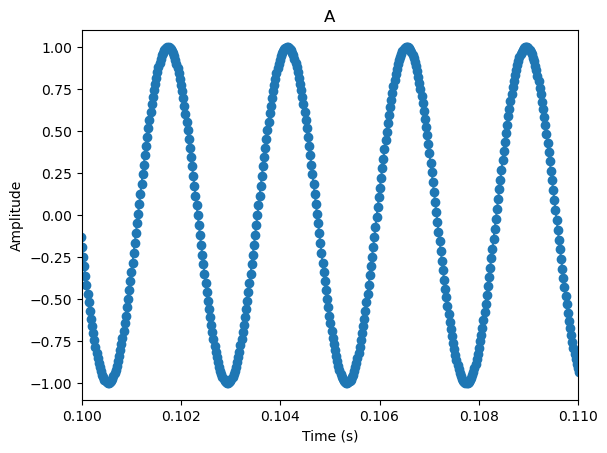

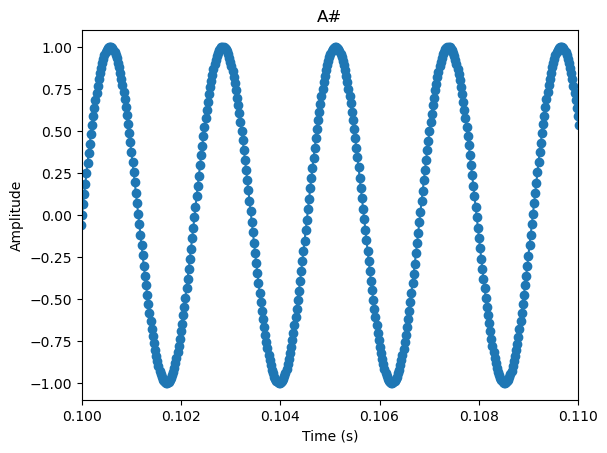

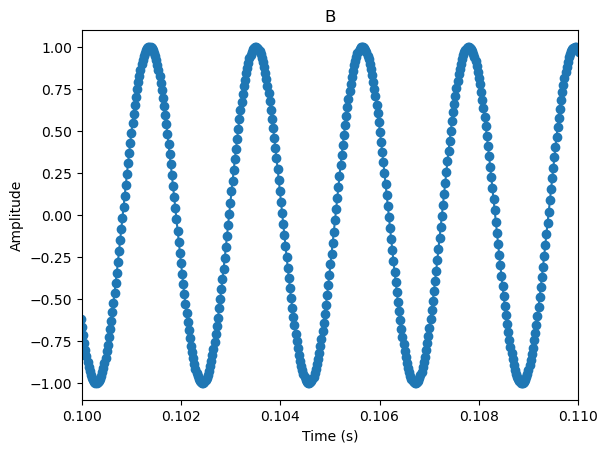

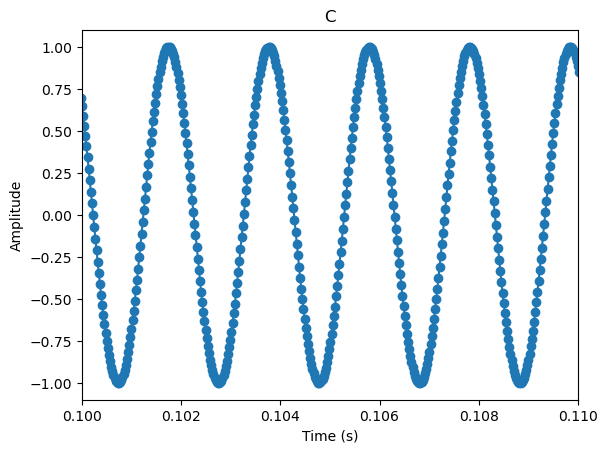

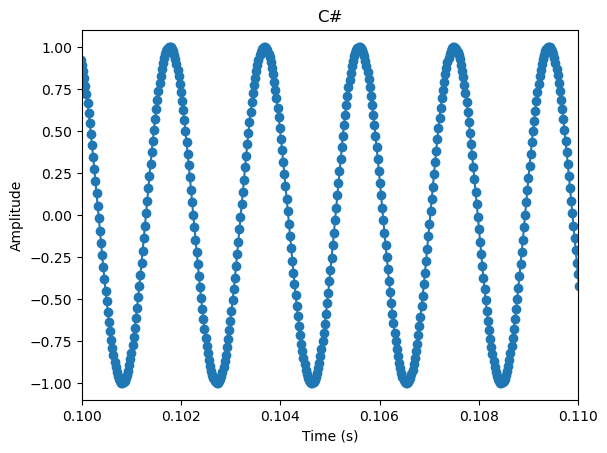

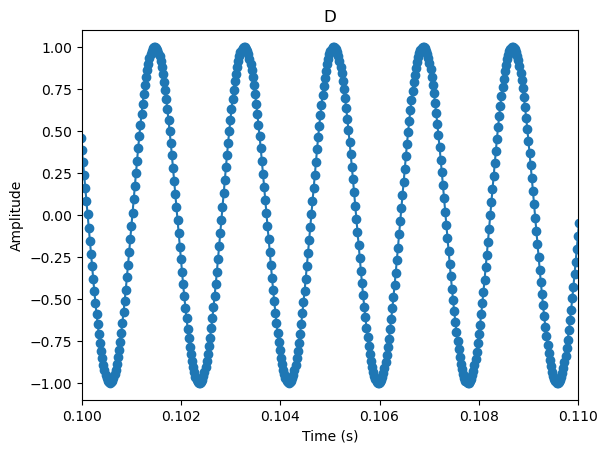

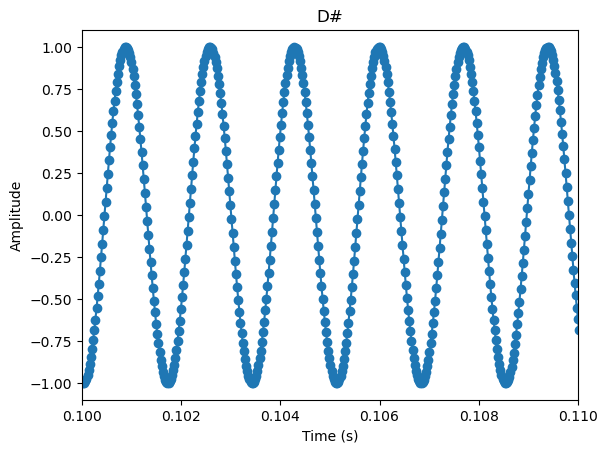

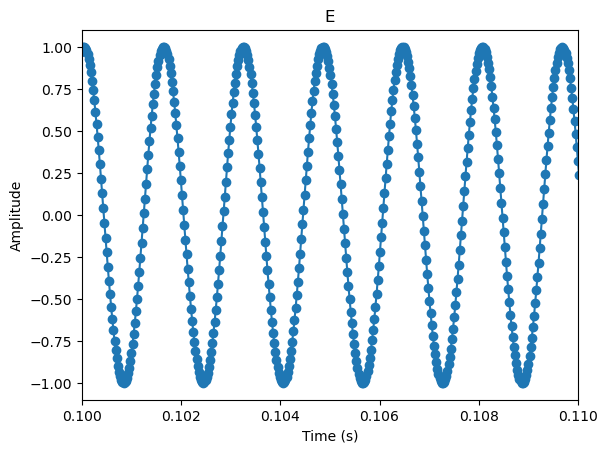

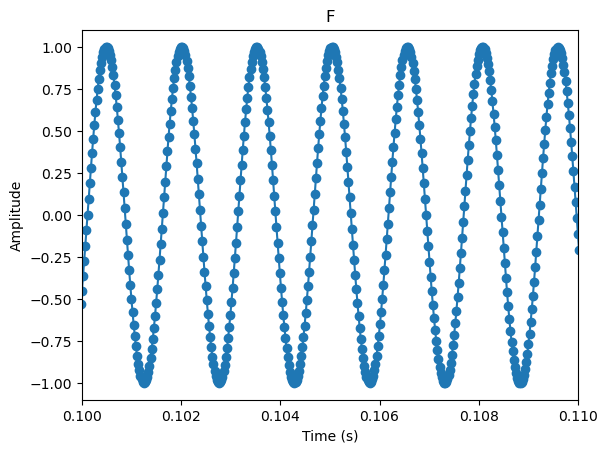

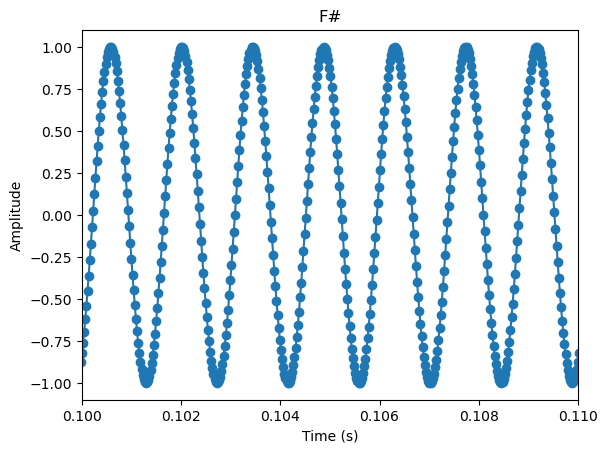

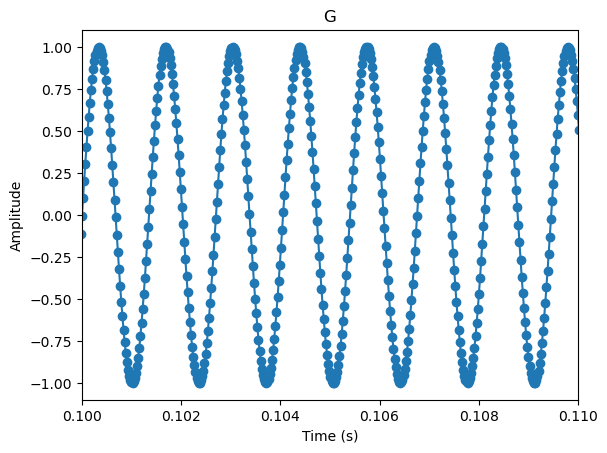

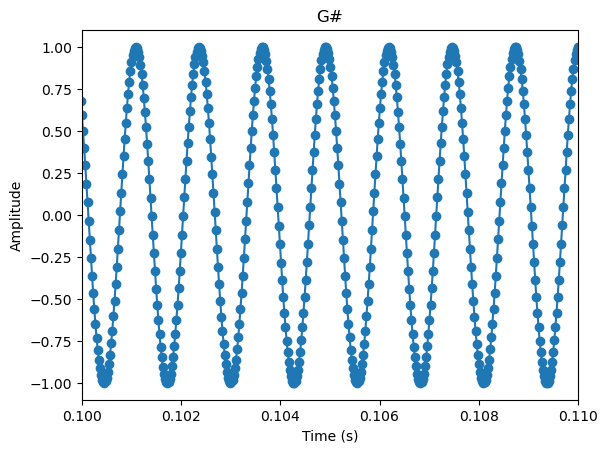

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sounddevice as sd

# Piano notes in sequence starting from A4 (440 Hz)
notename = ['A', 'A#', 'B', 'C', 'C#', 'D', 'D#', 'E', 'F', 'F#', 'G', 'G#']

# Duration of each note (seconds)
dur = 0.3

# Sampling frequency (Hertz)
fs = 44100

# Time vector
dt = 1/fs
nt = int(dur/dt)
t = np.linspace(0, dur, int(fs * dur), endpoint=False)

for n in range(len(notename)):
    # Convert sequential note number to frequency
    f = 440 * 2 ** ((n-1) / 12)

    # Simple harmonic oscillation
    y = np.sin(2 * np.pi * t * f)

    # Plot a numerical representation of a musical note
    plt.figure(1)
    plt.clf()
    plt.plot(t, y, 'o-')
    plt.title(notename[n])
    plt.xlim([0.1, 0.11])
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.show()

    # Play note
    sd.play(y, fs)
    sd.wait()


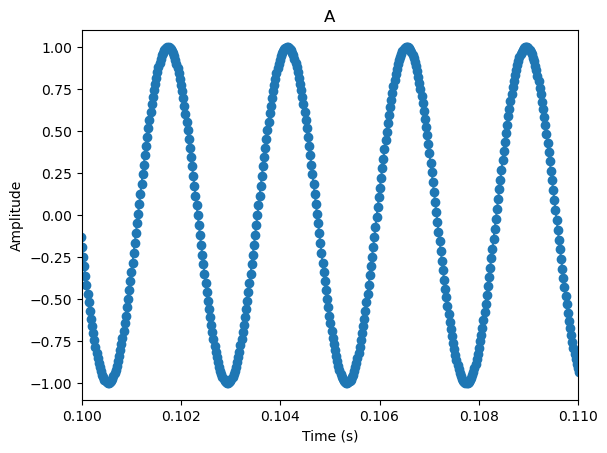

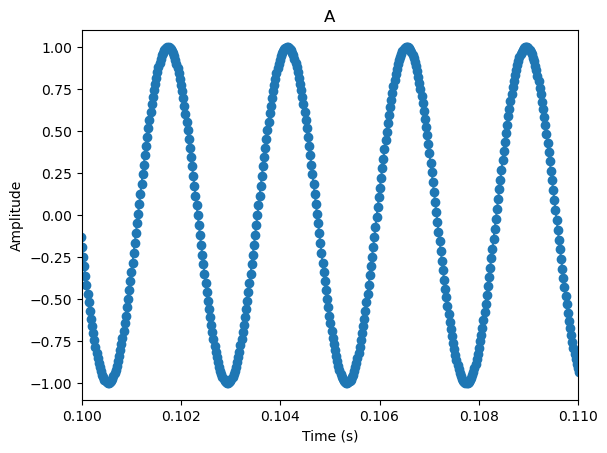

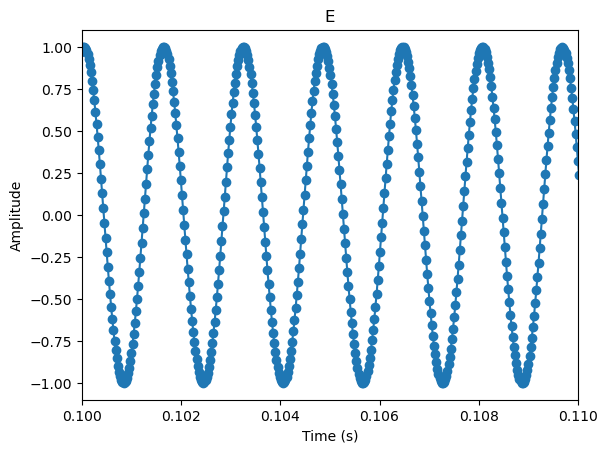

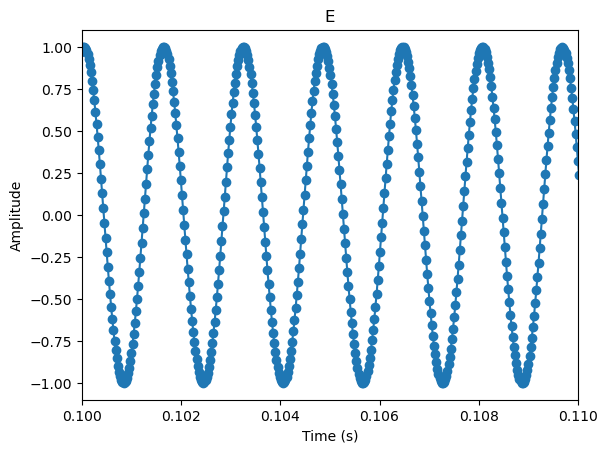

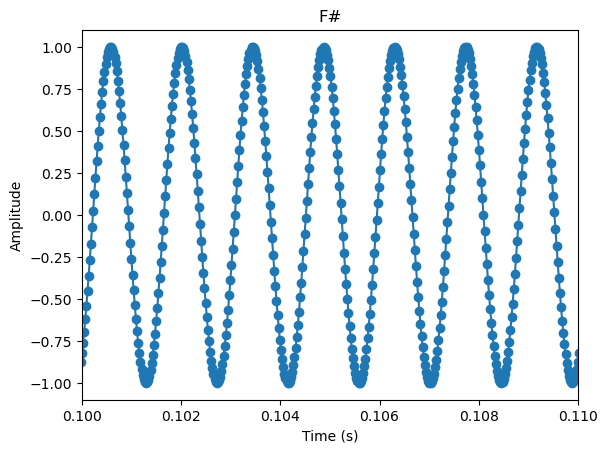

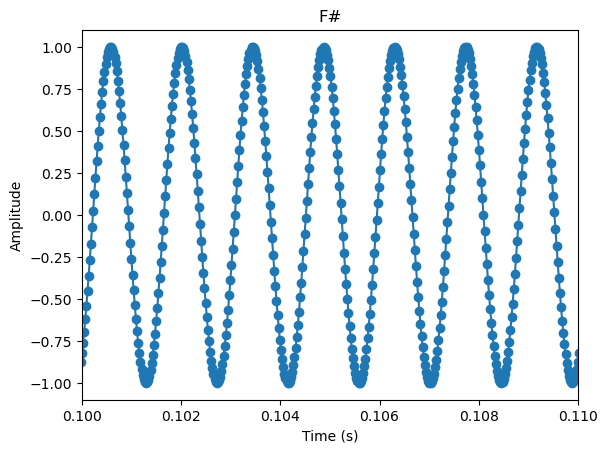

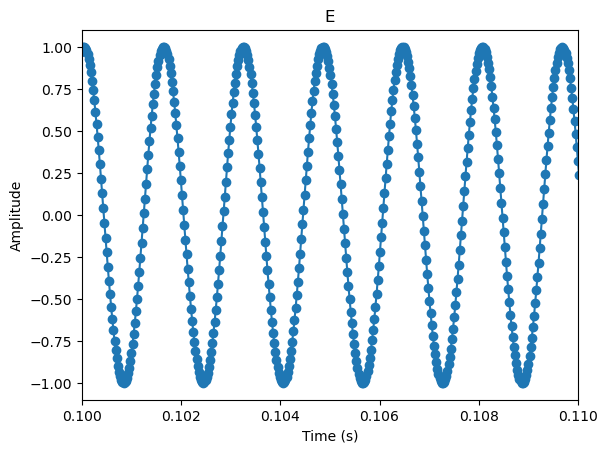

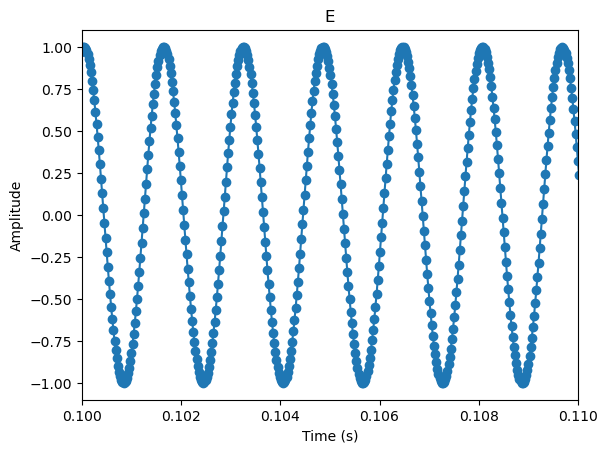

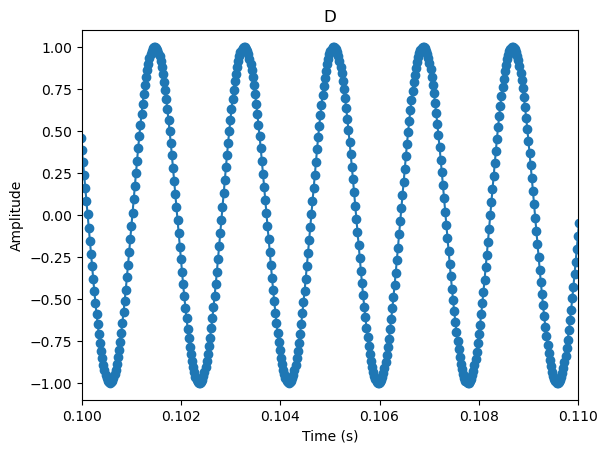

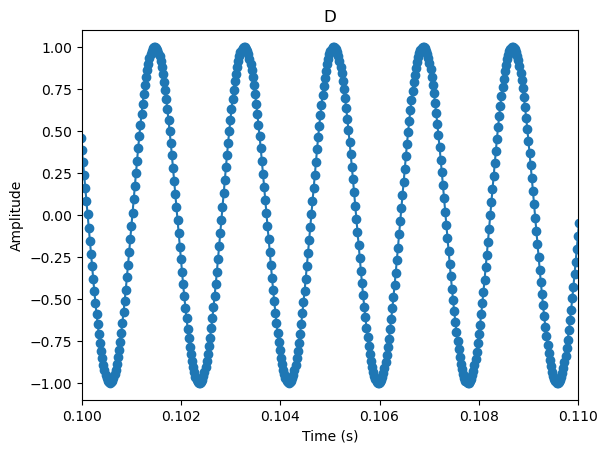

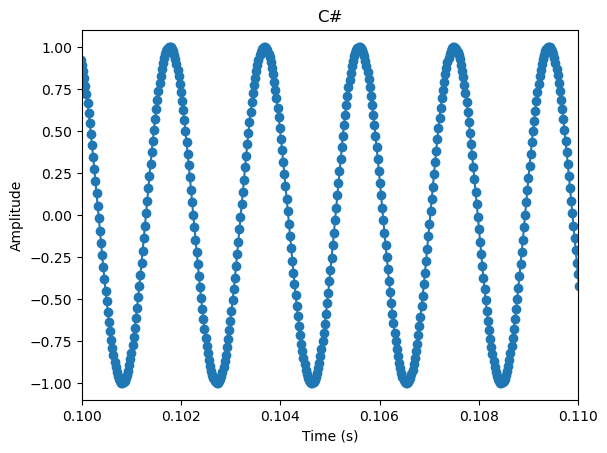

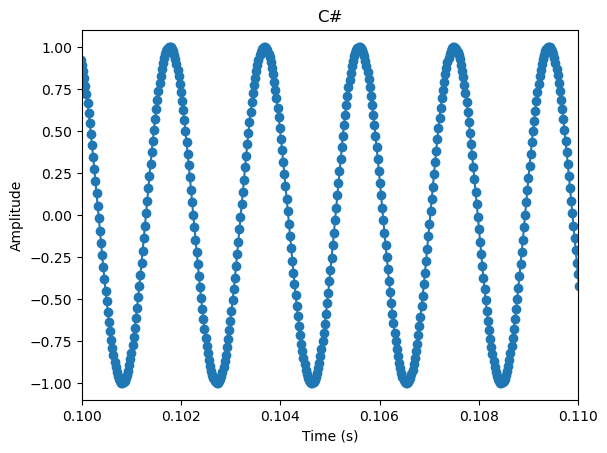

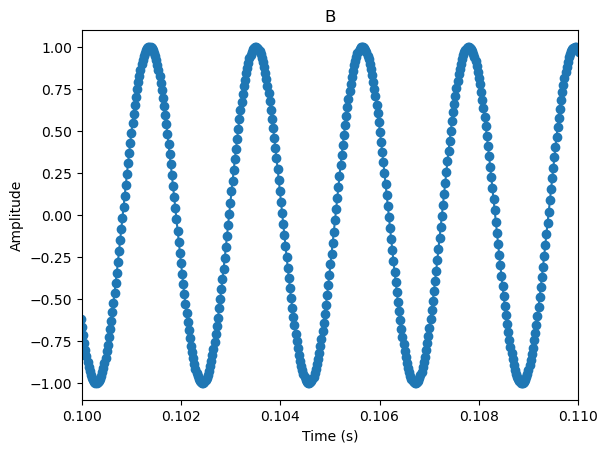

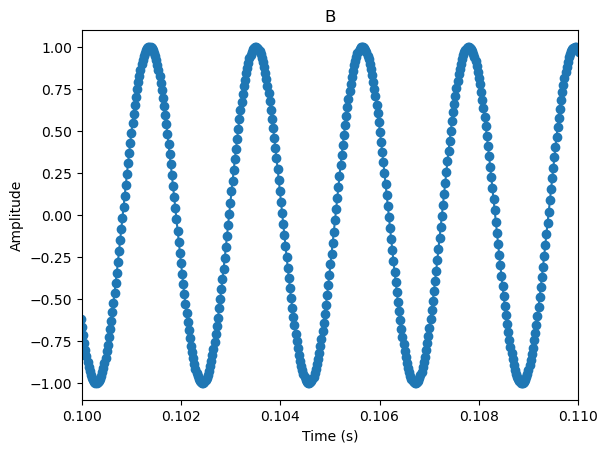

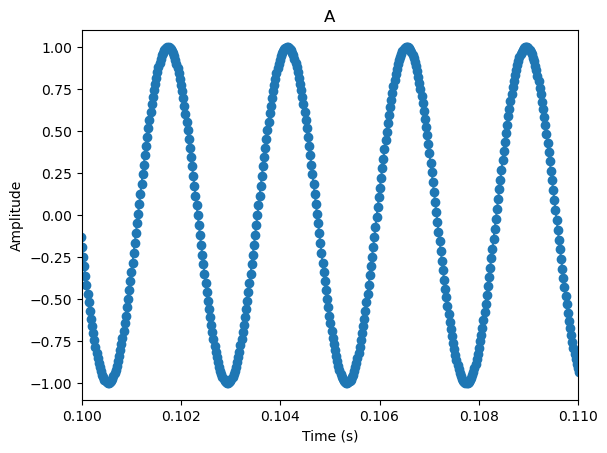

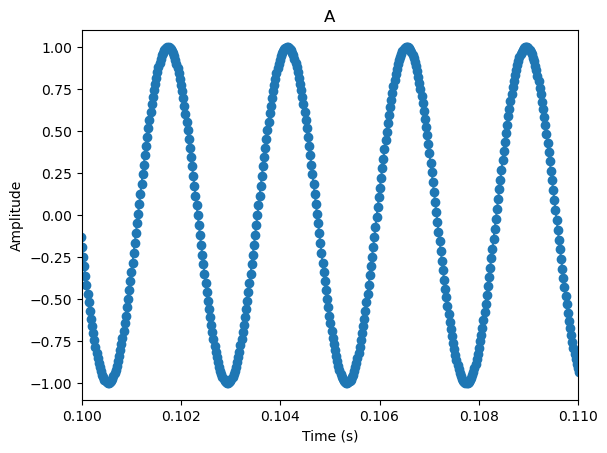

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import sounddevice as sd

# Piano notes in sequence starting from A4 (440 Hz)
notename = ['A', 'A#', 'B', 'C', 'C#', 'D', 'D#', 'E', 'F', 'F#', 'G', 'G#']

# Duration of each note (seconds)
dur = 0.5

# Sampling frequency (Hertz)
fs = 44100

# Time vector
dt = 1/fs
nt = int(dur/dt)
t = np.linspace(0, dur, int(fs * dur), endpoint=False)

# Let's play a simple song
song = ['A', 'A', 'E', 'E', 'F#', 'F#', 'E', 'E', 'D', 'D', 'C#', 'C#', 'B', 'B', 'A', 'A']

for note in song:
    n = notename.index(note)

    # Convert sequential note number to frequency
    f = 440 * 2 ** ((n-1) / 12)

    # Simple harmonic oscillation
    y = np.sin(2 * np.pi * t * f)

    # Plot a numerical representation of a musical note
    plt.figure(1)
    plt.clf()
    plt.plot(t, y, 'o-')
    plt.title(notename[n])
    plt.xlim([0.1, 0.11])
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.show()

    # Play note
    sd.play(y, fs)
    sd.wait()


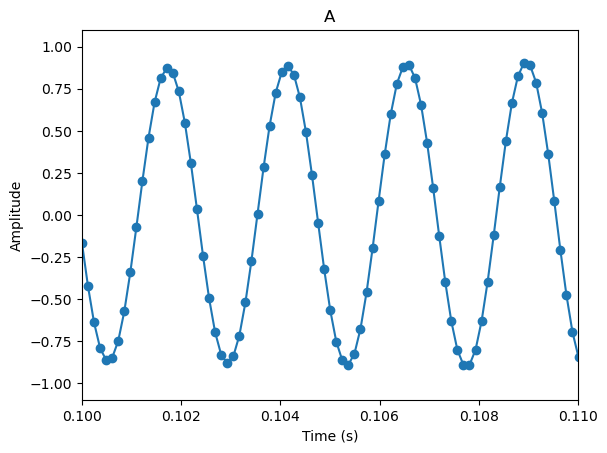

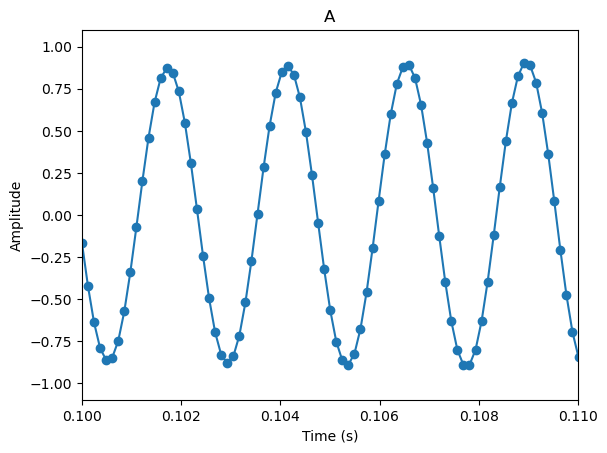

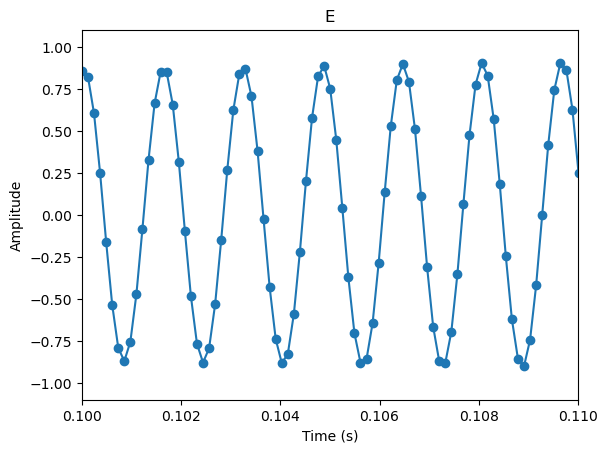

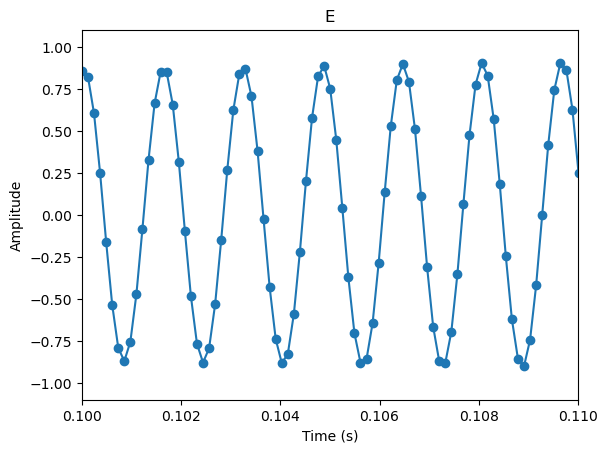

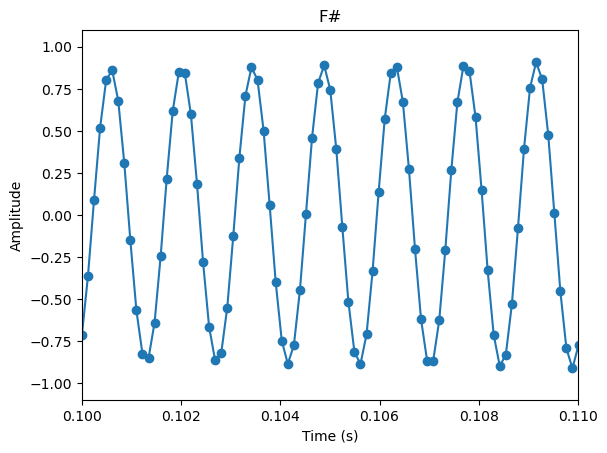

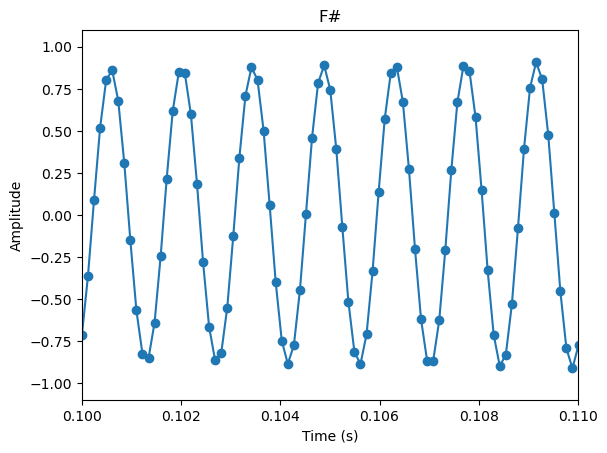

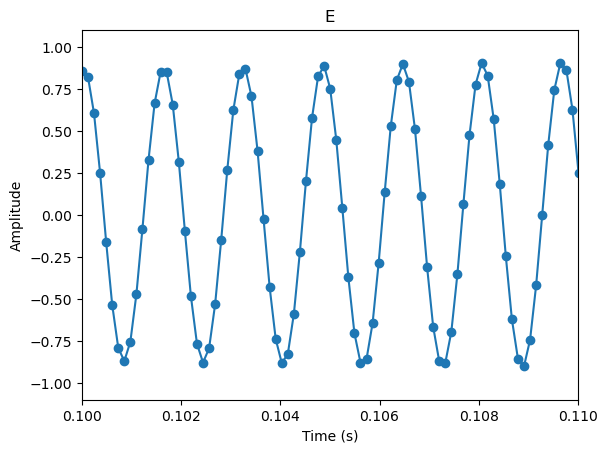

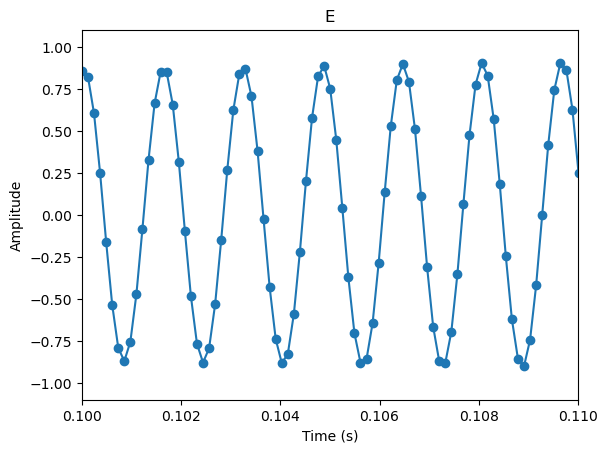

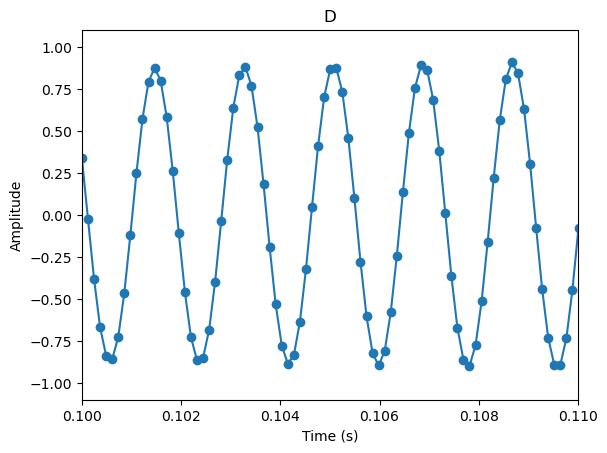

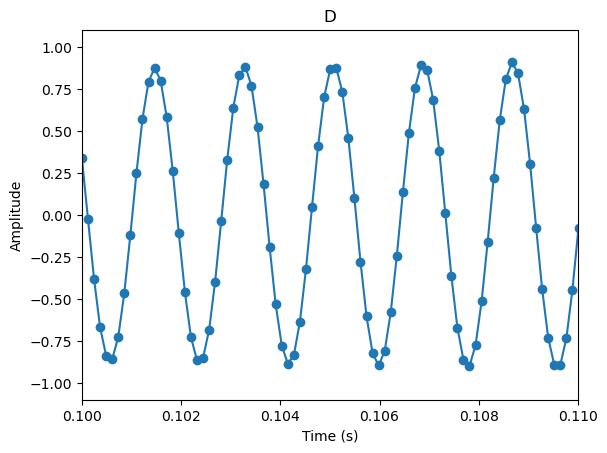

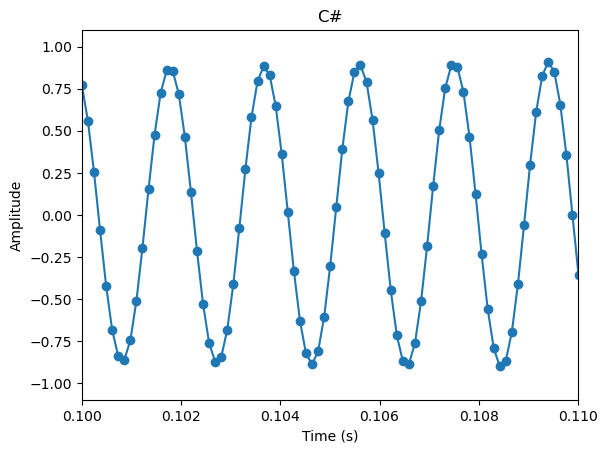

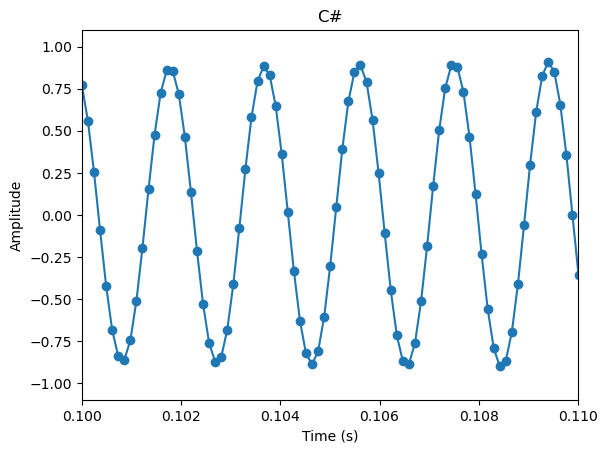

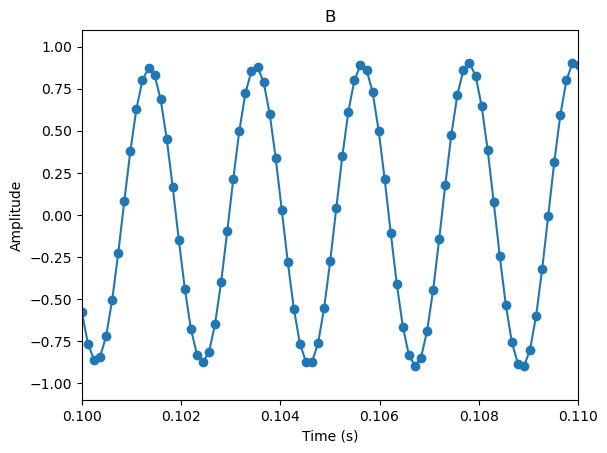

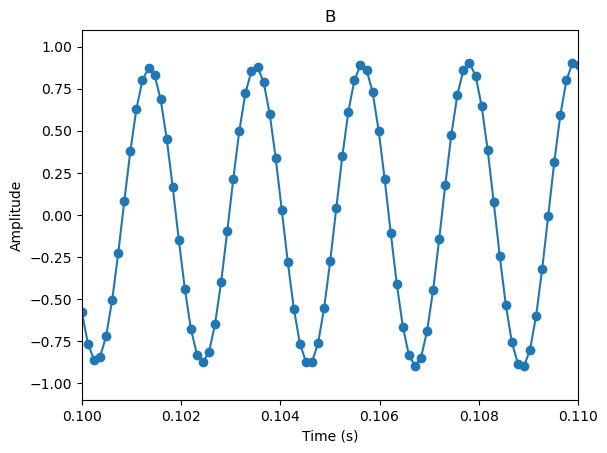

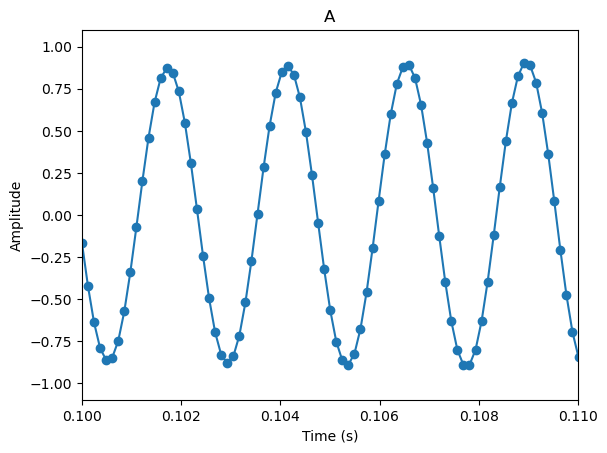

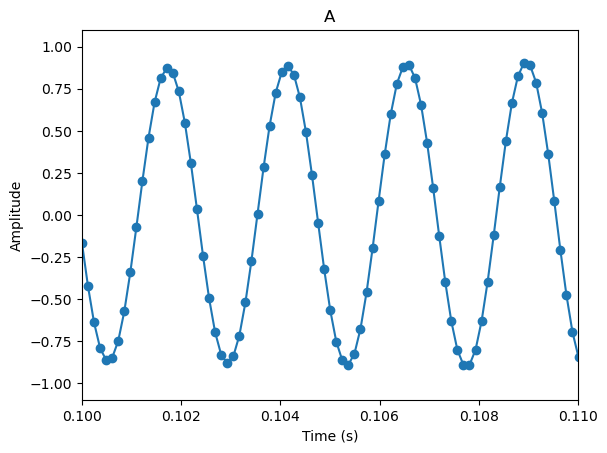

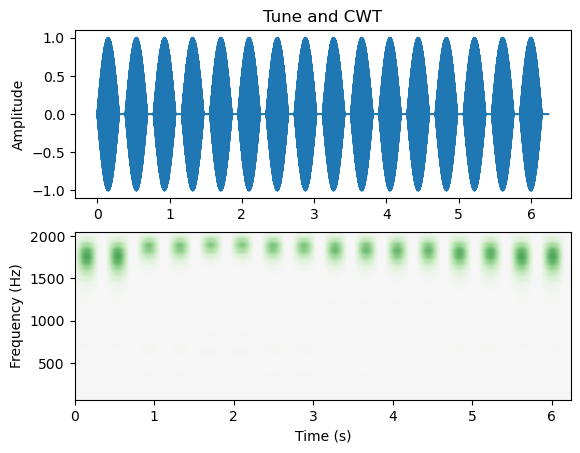

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import sounddevice as sd
import pywt
from scipy.io.wavfile import write

# Piano notes in sequence starting from A4 (440 Hz)
notename = ['A', 'A#', 'B', 'C', 'C#', 'D', 'D#', 'E', 'F', 'F#', 'G', 'G#']

# Duration of each note (seconds)
dur = 0.3

# Sampling frequency (Hertz)
fs = 8192

# Time vector
dt = 1/fs
nt = int(dur/dt)
t = np.linspace(0, dur, int(fs * dur), endpoint=False)

# Let's play a simple song
song = ['A', 'A', 'E', 'E', 'F#', 'F#', 'E', 'E', 'D', 'D', 'C#', 'C#', 'B', 'B', 'A', 'A']

# Initialize the song file
yout = np.array([])

for note in song:
    n = notename.index(note)

    # Convert sequential note number to frequency
    f = 440 * 2 ** ((n-1) / 12)

    # Harmonic oscillation + amplitude is damped at the beginning and at the end using a sine window
    y = np.sin(np.pi * t / dur) * np.sin(2 * np.pi * t * f)

    # Add some zeros at the end to separate notes and append notes together
    yout = np.concatenate((yout, y, np.zeros(int(0.3 * dur * fs))))

    # Plot a numerical representation of a musical note
    plt.figure(1)
    plt.clf()
    plt.plot(t, y, 'o-')
    plt.title(notename[n])
    plt.xlim([0.1, 0.11])
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.show()

# Play the whole song
sd.play(yout, fs)
sd.wait()

# Save the song to a file
# write('little_song_smooth.wav', fs, yout.astype(np.float32))

# Scales for CWT
widths = np.arange(1, 31)

# Perform CWT
cwtmatr, _ = pywt.cwt(yout, widths, 'mexh')

# Convert scales to frequencies
freqs = pywt.scale2frequency('mexh', widths) / dt

# Visualize the song and its CWT
plt.figure()
plt.subplot(2, 1, 1)
plt.plot(tout, yout)
plt.title('Tune and CWT')
plt.ylabel('Amplitude')
plt.axis('tight')

plt.subplot(2, 1, 2)
extent = [tout[0], tout[-1], freqs[0], freqs[-1]]
plt.imshow(np.abs(cwtmatr), aspect='auto', cmap='PRGn', extent=extent, origin='lower', vmax=abs(cwtmatr).max(), vmin=-abs(cwtmatr).max())
plt.ylim([200, 2000])  
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.axis('tight')
plt.show()

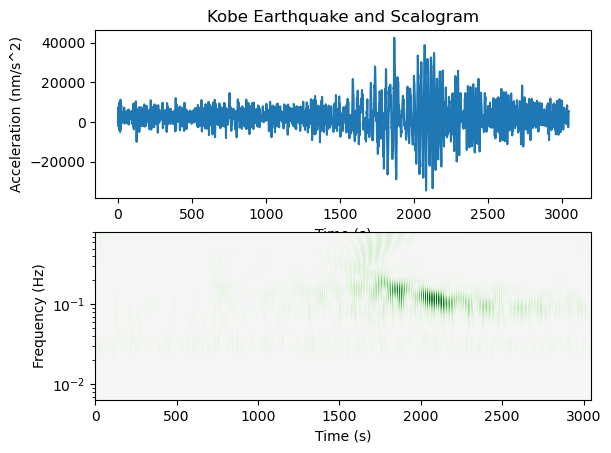

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import pywt

# Load the earthquake data
earthquake_data = np.loadtxt('earthquake_data.txt')

# Sampling frequency and time vector
fs = 1
t = np.arange(len(earthquake_data)) / fs

# Scales for CWT
widths = np.arange(1, 128)

# Perform CWT
cwtmatr, _ = pywt.cwt(earthquake_data, widths, 'morl')

# Convert scales to frequencies
dt = 1/fs  # Sampling period
freqs = pywt.scale2frequency('morl', widths) / dt


# Visualize the earthquake data and its scalogram
plt.figure()
plt.subplot(2, 1, 1)
plt.plot(t, earthquake_data)
plt.title('Kobe Earthquake and Scalogram')
plt.xlabel('Time (s)')
plt.ylabel('Acceleration (nm/s^2)')
plt.axis('tight')

plt.subplot(2, 1, 2)
extent = [t[0], t[-1], freqs[-1], freqs[0]]
plt.imshow(np.abs(cwtmatr), aspect='auto', cmap='PRGn', extent=extent, origin='lower', vmax=abs(cwtmatr).max(), vmin=-abs(cwtmatr).max())
plt.ylim([0.01, 2])  
plt.yscale('log')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.axis('tight')
plt.show()


In [22]:
pywt.wavelist()

['bior1.1',
 'bior1.3',
 'bior1.5',
 'bior2.2',
 'bior2.4',
 'bior2.6',
 'bior2.8',
 'bior3.1',
 'bior3.3',
 'bior3.5',
 'bior3.7',
 'bior3.9',
 'bior4.4',
 'bior5.5',
 'bior6.8',
 'cgau1',
 'cgau2',
 'cgau3',
 'cgau4',
 'cgau5',
 'cgau6',
 'cgau7',
 'cgau8',
 'cmor',
 'coif1',
 'coif2',
 'coif3',
 'coif4',
 'coif5',
 'coif6',
 'coif7',
 'coif8',
 'coif9',
 'coif10',
 'coif11',
 'coif12',
 'coif13',
 'coif14',
 'coif15',
 'coif16',
 'coif17',
 'db1',
 'db2',
 'db3',
 'db4',
 'db5',
 'db6',
 'db7',
 'db8',
 'db9',
 'db10',
 'db11',
 'db12',
 'db13',
 'db14',
 'db15',
 'db16',
 'db17',
 'db18',
 'db19',
 'db20',
 'db21',
 'db22',
 'db23',
 'db24',
 'db25',
 'db26',
 'db27',
 'db28',
 'db29',
 'db30',
 'db31',
 'db32',
 'db33',
 'db34',
 'db35',
 'db36',
 'db37',
 'db38',
 'dmey',
 'fbsp',
 'gaus1',
 'gaus2',
 'gaus3',
 'gaus4',
 'gaus5',
 'gaus6',
 'gaus7',
 'gaus8',
 'haar',
 'mexh',
 'morl',
 'rbio1.1',
 'rbio1.3',
 'rbio1.5',
 'rbio2.2',
 'rbio2.4',
 'rbio2.6',
 'rbio2.8',
 'rbio3.1',